In [19]:
#필요 라이브러리
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../../DataPreprocessing/sort_asc/data1_sorted_asc.csv')
# print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183696 entries, 0 to 1183695
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   행정동코드    1183696 non-null  int64  
 1   시도명      1183696 non-null  object 
 2   시군구명     1183696 non-null  object 
 3   행정동명     1183696 non-null  object 
 4   기준일자     1183696 non-null  int64  
 5   성별       1183696 non-null  object 
 6   연령대      1183696 non-null  object 
 7   소비인구(명)  1183696 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 72.2+ MB
None


In [11]:
#연령대의 데이터가 xx가 아니고 20~40 사이 데이터만 추출
numeric_age = pd.to_numeric(df['연령대'], errors='coerce')
cond1 = (numeric_age >= 20)
cond2 = (numeric_age <= 40)
cond3 = pd.notna(numeric_age)

condition = (cond1 & cond2 & cond3)

result = df[condition]
print(result)


              행정동코드    시도명 시군구명  행정동명      기준일자 성별 연령대     소비인구(명)
0        1165053000  서울특별시  서초구  서초3동  20230501  F  25  144.027005
2        1111064000  서울특별시  종로구   이화동  20230501  F  20  152.028506
3        1111064000  서울특별시  종로구   이화동  20230501  F  25  208.039008
4        1111064000  서울특별시  종로구   이화동  20230501  F  30  136.025505
5        1111064000  서울특별시  종로구   이화동  20230501  F  35   80.015003
...             ...    ...  ...   ...       ... ..  ..         ...
1183679  1165055000  서울특별시  서초구  반포본동  20231031  M  30   23.603037
1183687  1165054000  서울특별시  서초구   잠원동  20231031  M  25   94.412146
1183690  1165054000  서울특별시  서초구   잠원동  20231031  F  30  102.279825
1183691  1165054000  서울특별시  서초구   잠원동  20231031  F  35  133.750540
1183692  1174070000  서울특별시  강동구  둔촌2동  20231031  M  25   62.941431

[562496 rows x 8 columns]


In [14]:
# 데이터들을 날짜 기준으로 묶기
Date_sum = result.groupby('기준일자')['소비인구(명)'].sum().reset_index()
# 소수점 둘째짜리까지 반올림하기
Date_sum['소비인구(명)'] = Date_sum['소비인구(명)'].round(2)
print(Date_sum)

         기준일자    소비인구(명)
0    20230501  194740.51
1    20230502  246374.20
2    20230503  248278.55
3    20230504  250238.92
4    20230505  256520.10
..        ...        ...
179  20231027  260317.89
180  20231028  264401.22
181  20231029  265825.26
182  20231030  288767.42
183  20231031  298436.79

[184 rows x 2 columns]


In [15]:
Date_sum.to_csv('data_sum_youth', index=False, encoding='utf-8-sig')

In [20]:
# 머신러닝을 이용한 데이터 상관관계 분석
# 1.파일 읽어오기
try:
    sales_df = pd.read_csv('data_sum_youth')
    weather_df = pd.read_csv('weather_combined_2305-2310.csv')
    print('파일을 성공적으로 읽어왔습니다.')
except Exception as e:
    print(f'파일을 읽어오는 중 오류 발생 : {e}')

파일을 성공적으로 읽어왔습니다.


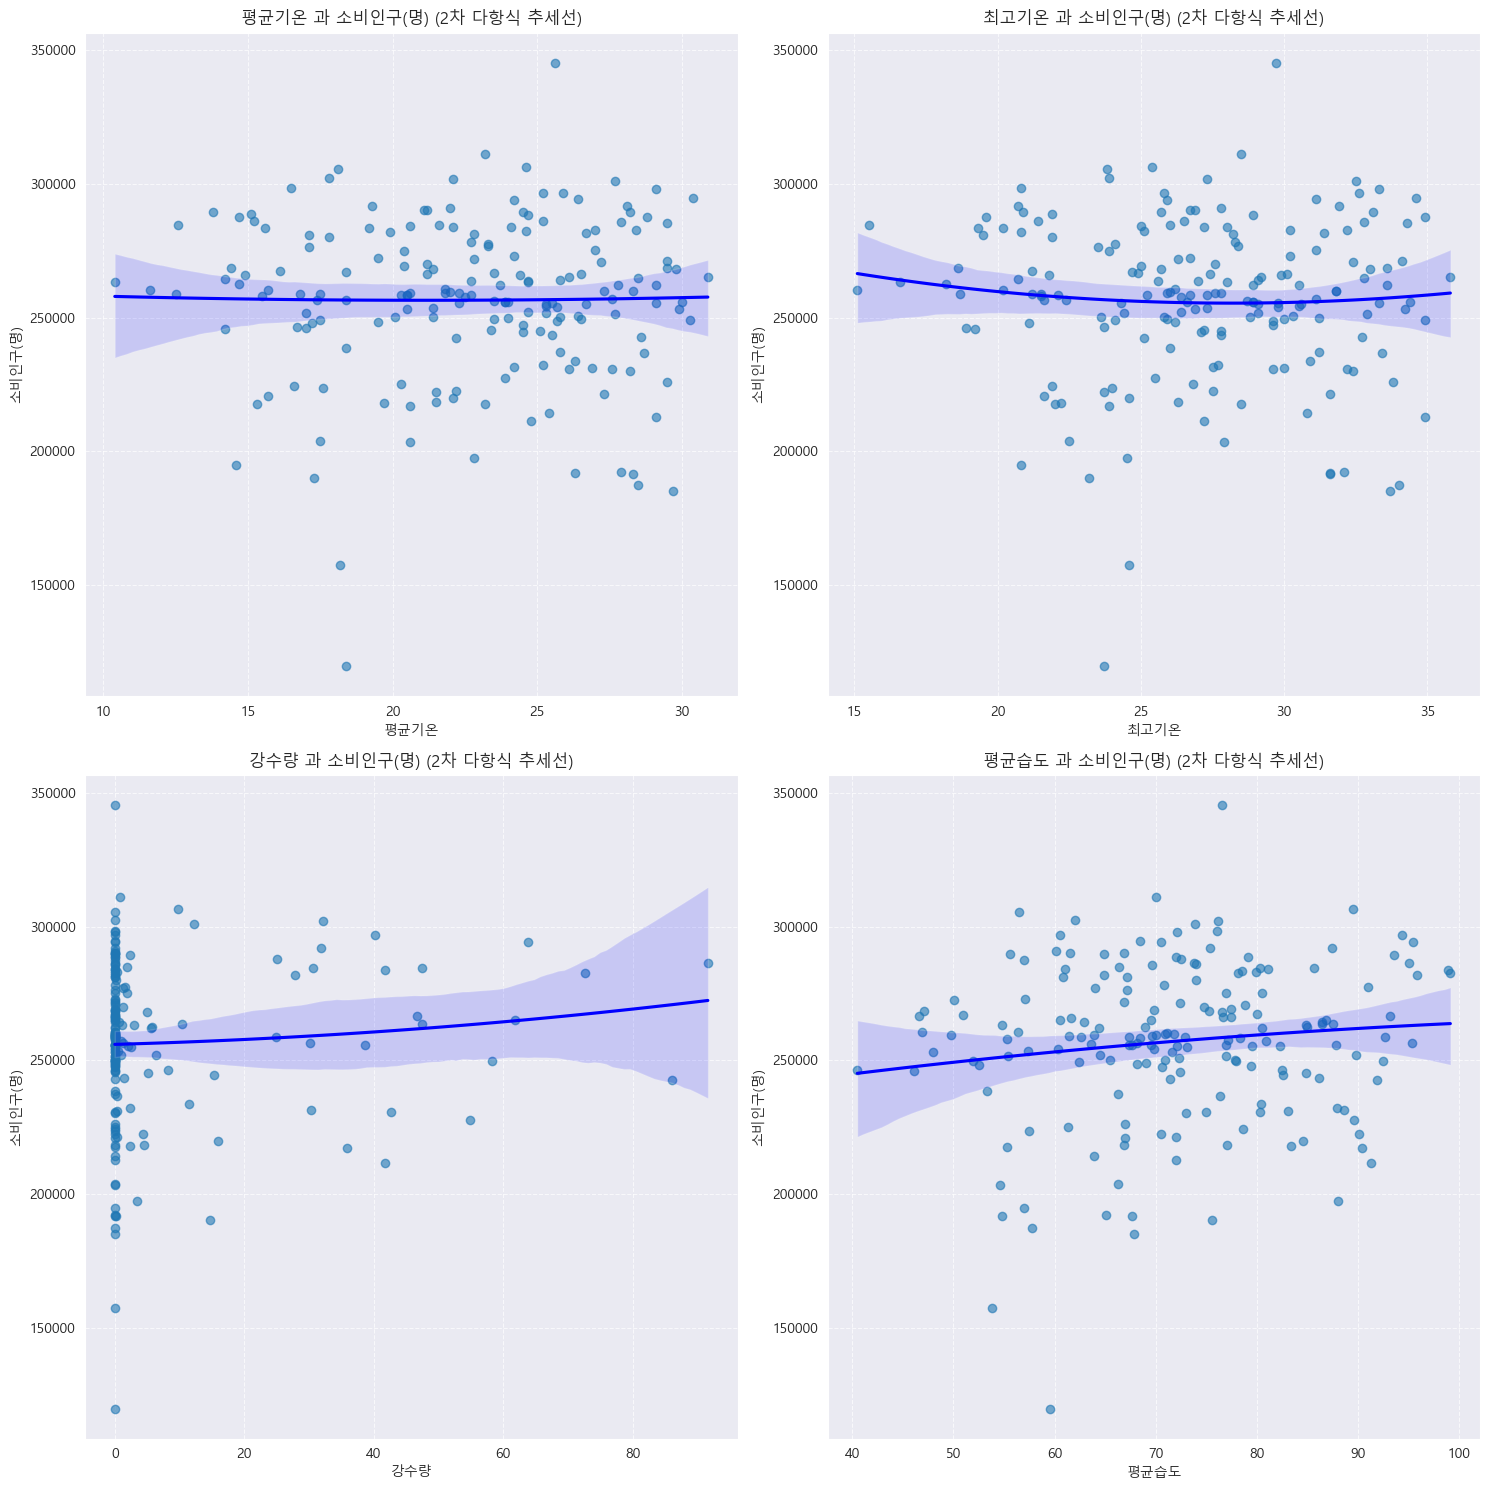

In [22]:
# 2. 데이터의 상관관계를 눈으로 먼저 분석하기 시각화하기 -> 산점도로 표현
df = pd.merge(sales_df , weather_df, on='기준일자')
weather_features = ['평균기온','최고기온','강수량','평균습도']
target = '소비인구(명)'

#그래프 그리기
plt.figure(figsize=(15,15))

for i, feature in enumerate(weather_features):
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    plt.subplot(2, 2, i+1)
    sns.regplot(x=feature, y=target, data=df, order=2,scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
    plt.title(f'{feature} 과 {target} (2차 다항식 추세선)', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel(target, fontsize=10)
    plt.grid(True , linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

             기준일자   소비인구(명)      평균기온      최고기온       강수량      평균습도
기준일자     1.000000 -0.169892 -0.185231 -0.227505 -0.089891  0.085451
소비인구(명) -0.169892  1.000000  0.002729 -0.031466  0.079172  0.124895
평균기온    -0.185231  0.002729  1.000000  0.941800  0.029081  0.262685
최고기온    -0.227505 -0.031466  0.941800  1.000000 -0.146952 -0.001765
강수량     -0.089891  0.079172  0.029081 -0.146952  1.000000  0.582051
평균습도     0.085451  0.124895  0.262685 -0.001765  0.582051  1.000000


AttributeError: QuadMesh.set() got an unexpected keyword argument 'camp'

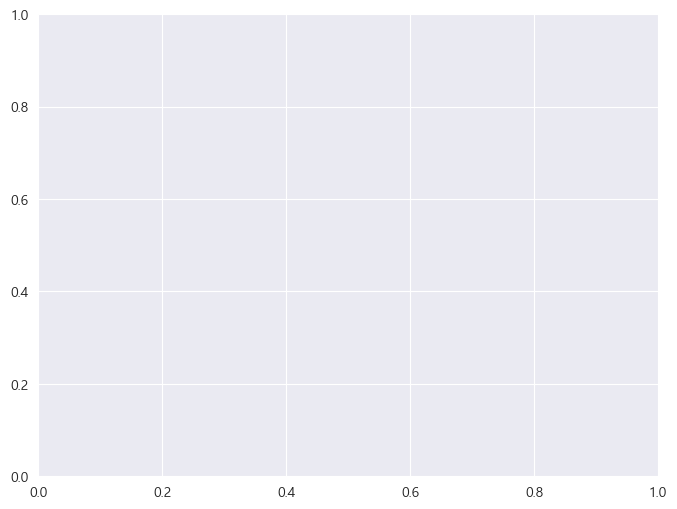

In [23]:
corr_matrix = df.corr()
print(corr_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', camp='coolwarm')
plt.title("상관관계 히트맵")
plt.show()